In [22]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("ToyotaCorolla_1.csv",encoding="latin1")
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [4]:
new_data=pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)

In [5]:
new_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
new_data=new_data.drop_duplicates().reset_index(drop=True)

In [7]:
new_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [8]:
new_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


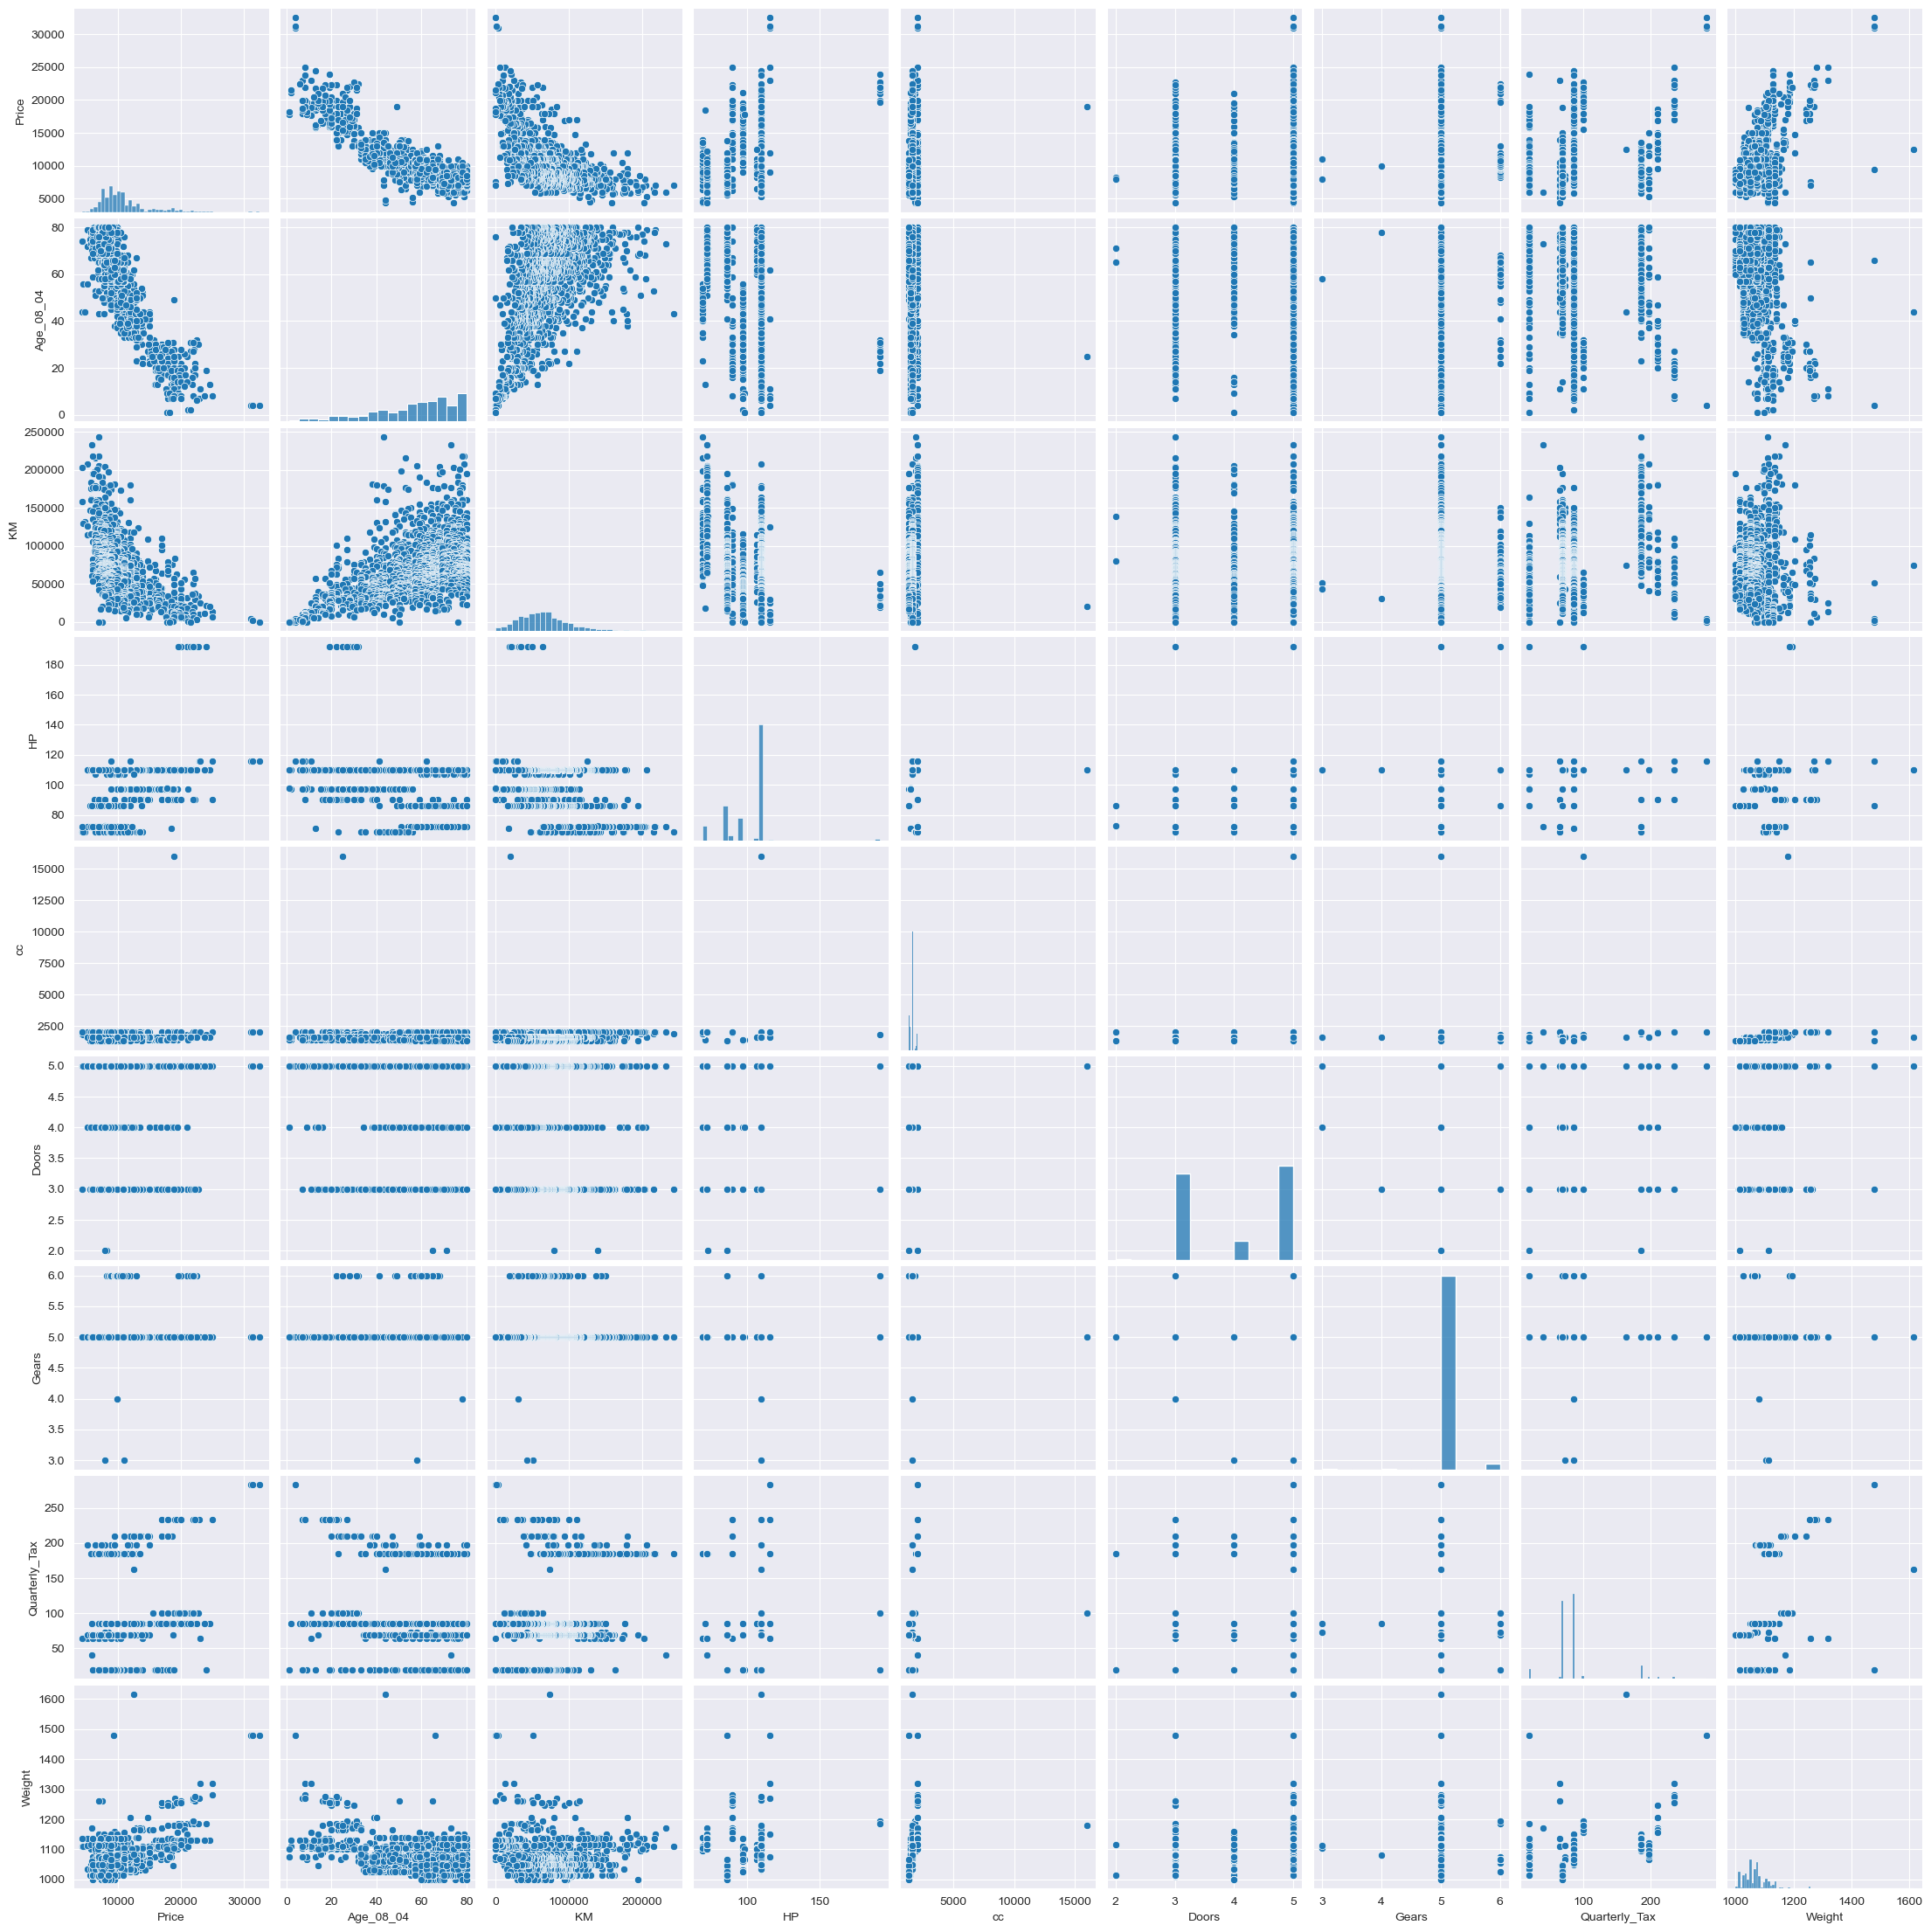

In [16]:
sb.set_style(style='darkgrid')
sb.pairplot(new_data)

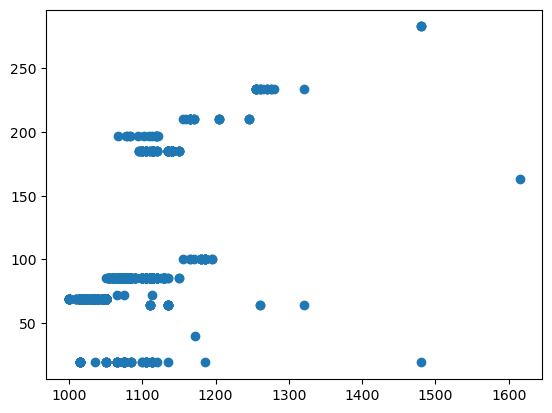

In [9]:
plt.scatter(new_data["Weight"],new_data["Quarterly_Tax"])

# No strong co-relation between any data

In [10]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()

In [11]:
model.rsquared

0.8625200256947

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:02:19   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=new_data).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=new_data).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=new_data).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=new_data).fit().rsquared
vif_WT=1/(1-rsq_WT)


d1={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


# Test for Normality of Residuals(Q-Q plot)

(array([  1.,   1.,   0.,   1.,   2.,   1.,   2.,   9.,  36., 110., 252.,
        379., 327., 196.,  77.,  26.,   7.,   5.,   0.,   3.]),
 array([-9303.07039108, -8515.64731352, -7728.22423596, -6940.80115841,
        -6153.37808085, -5365.95500329, -4578.53192574, -3791.10884818,
        -3003.68577062, -2216.26269307, -1428.83961551,  -641.41653795,
          146.0065396 ,   933.42961716,  1720.85269472,  2508.27577227,
         3295.69884983,  4083.12192739,  4870.54500494,  5657.9680825 ,
         6445.39116006]),
 <BarContainer object of 20 artists>)

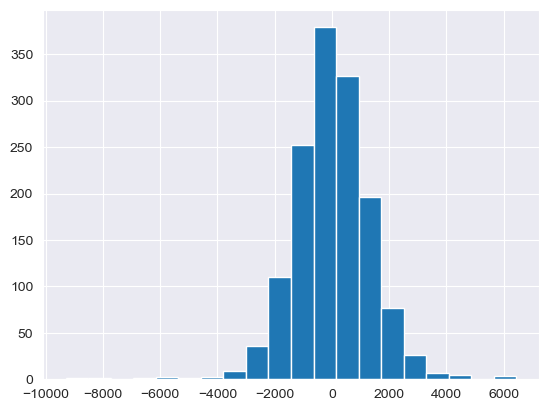

In [17]:
plt.hist(model.resid,bins=20)

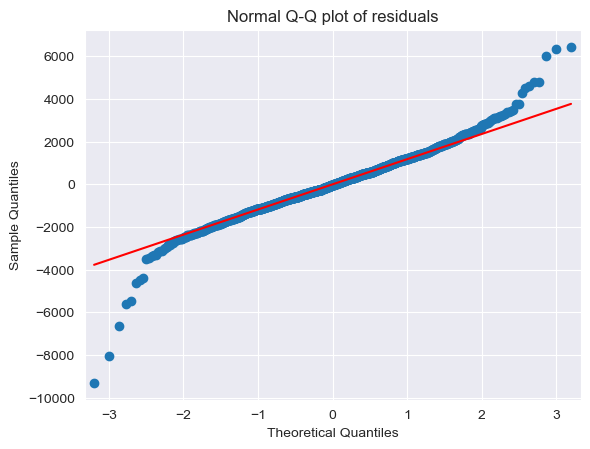

In [23]:
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

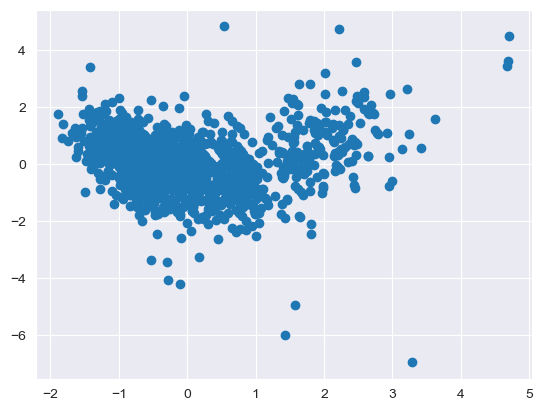

In [26]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))

eval_env: 1


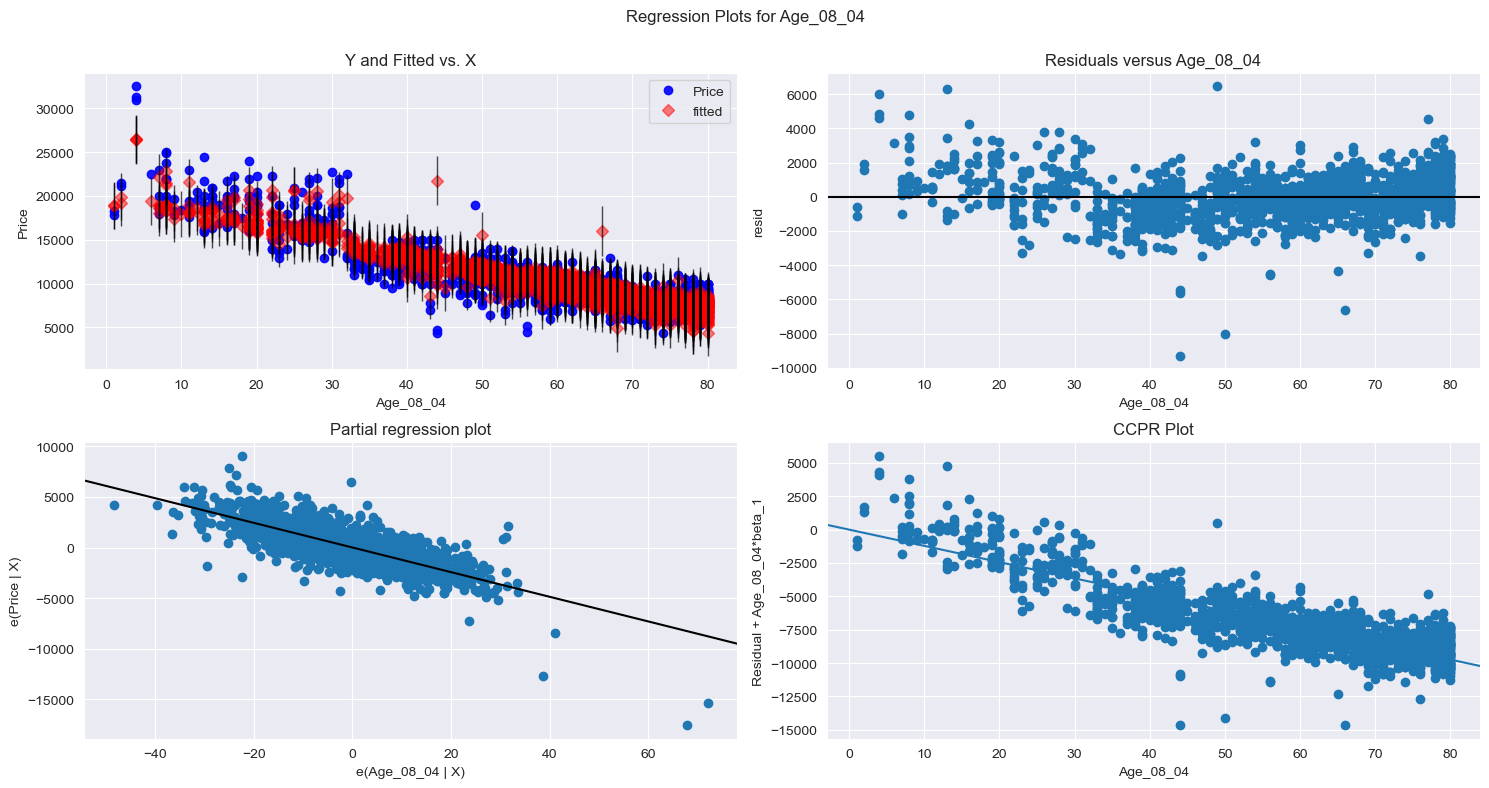

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

eval_env: 1


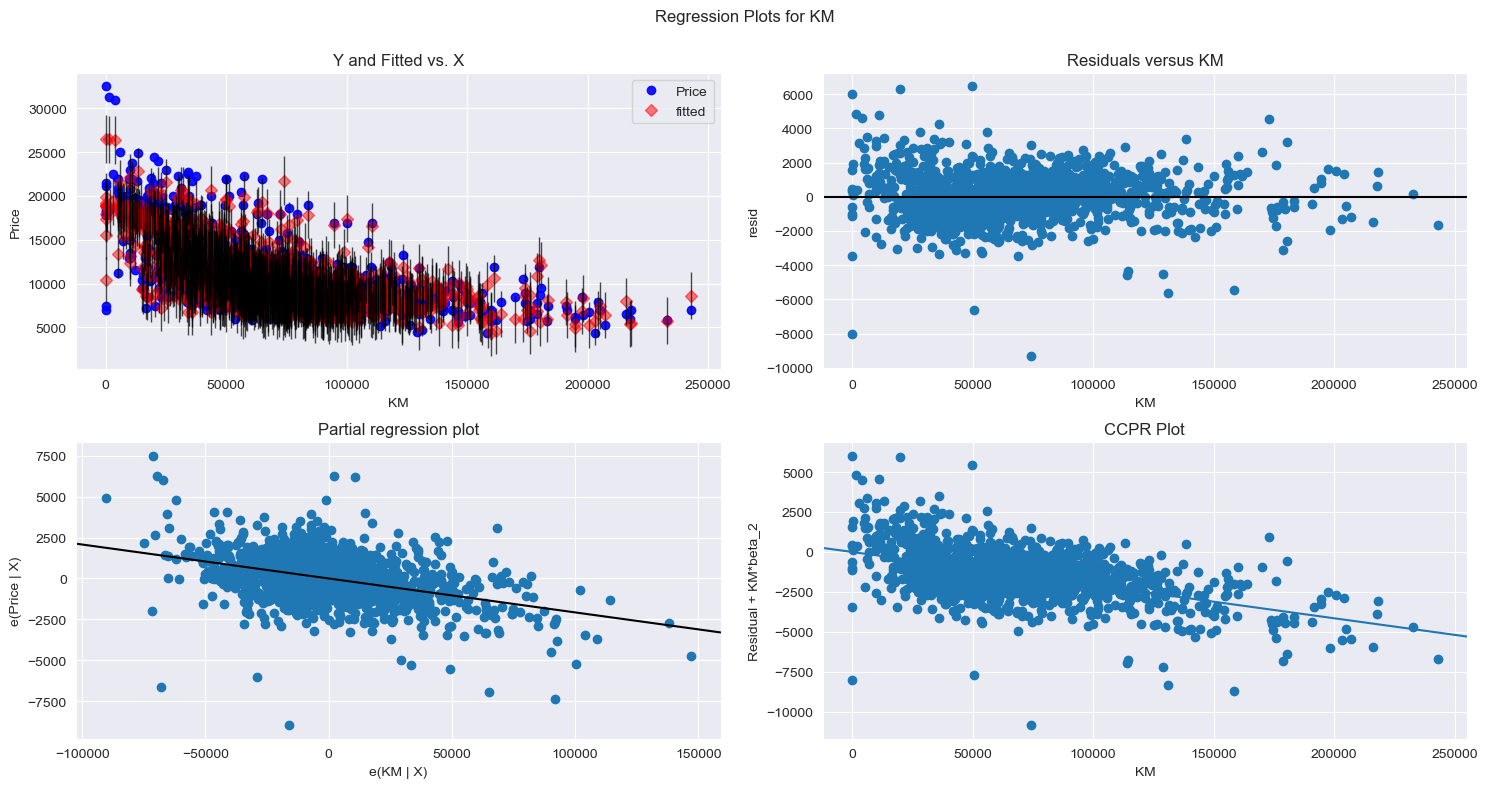

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


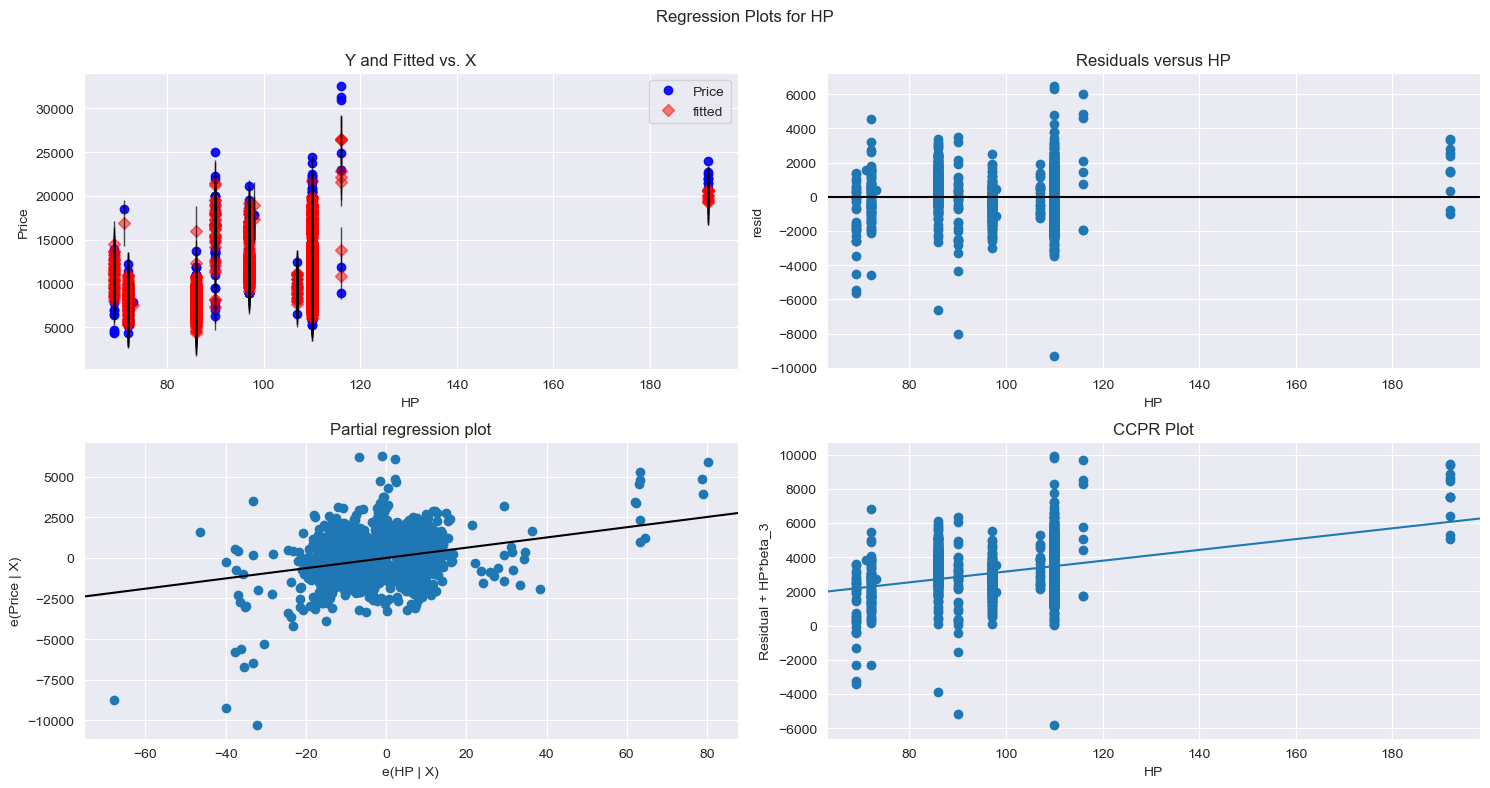

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


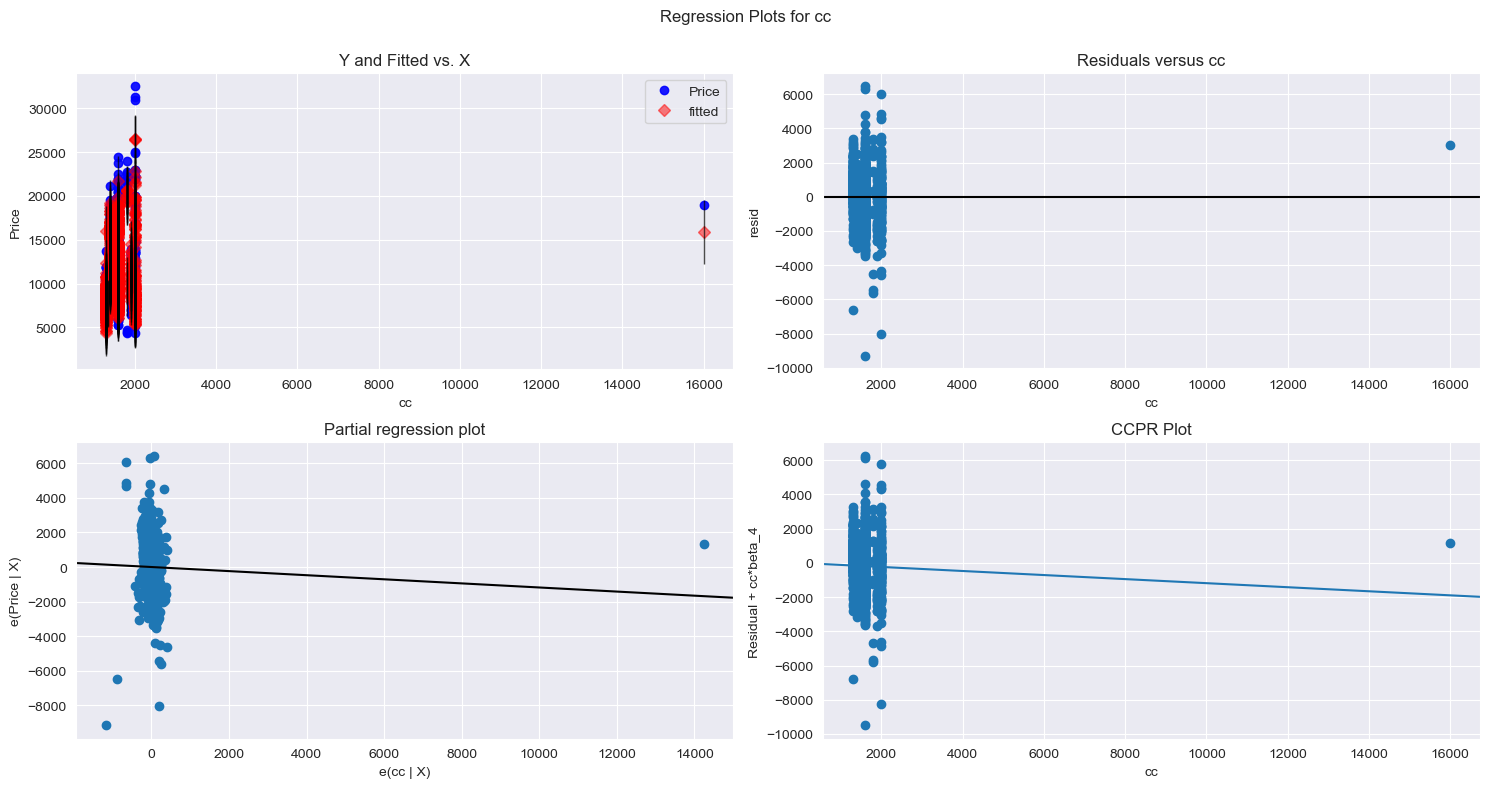

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


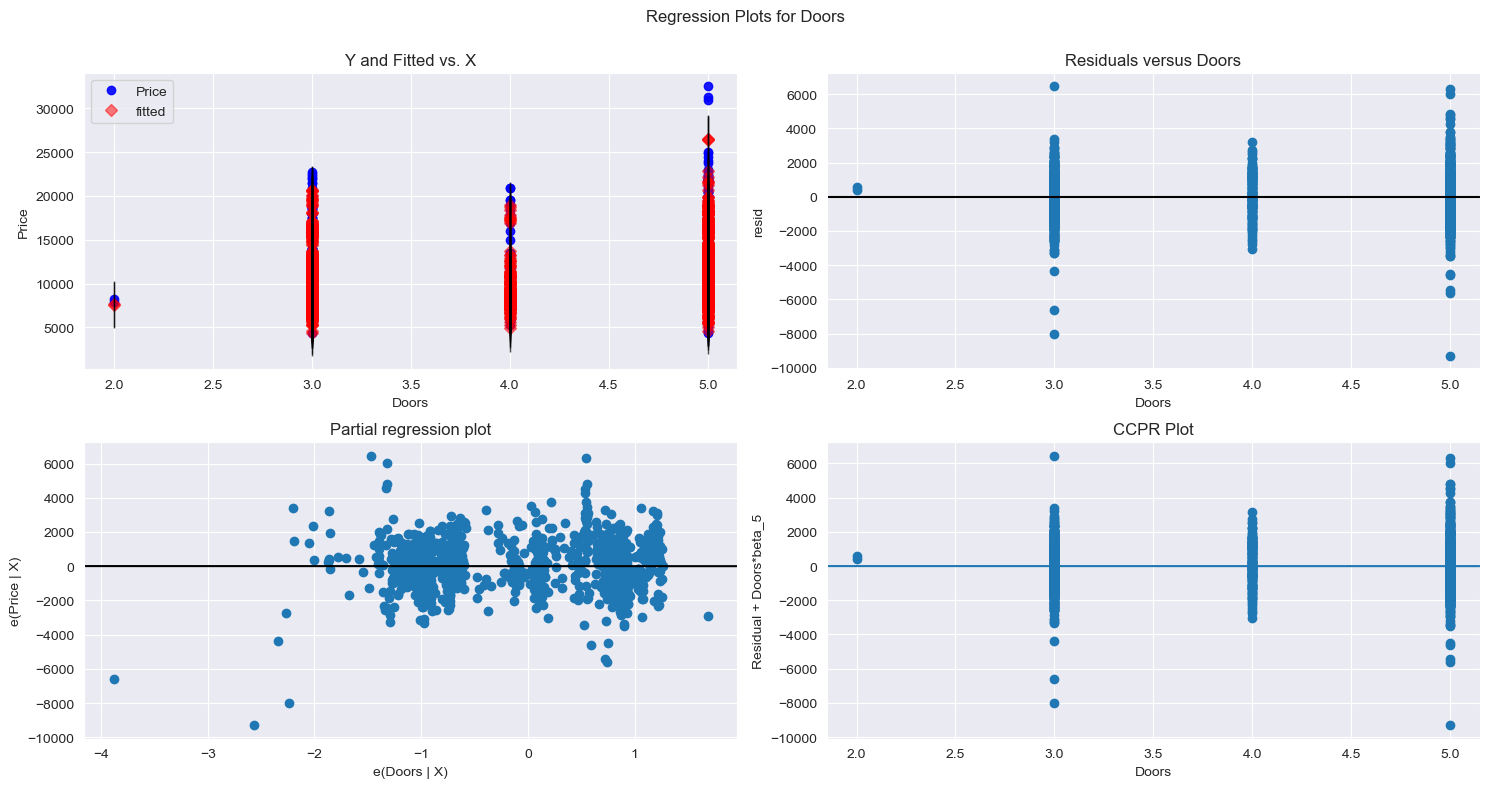

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


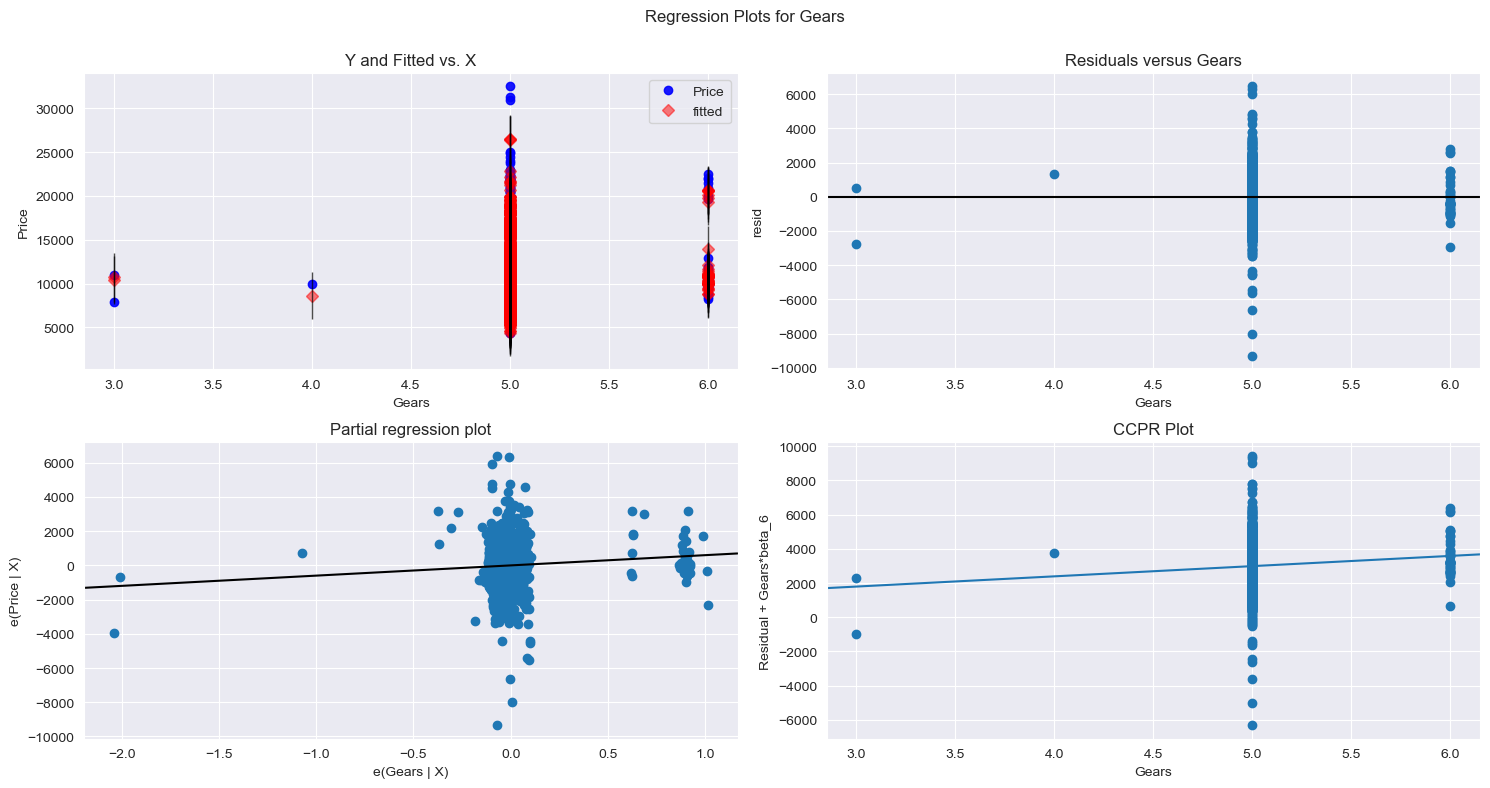

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


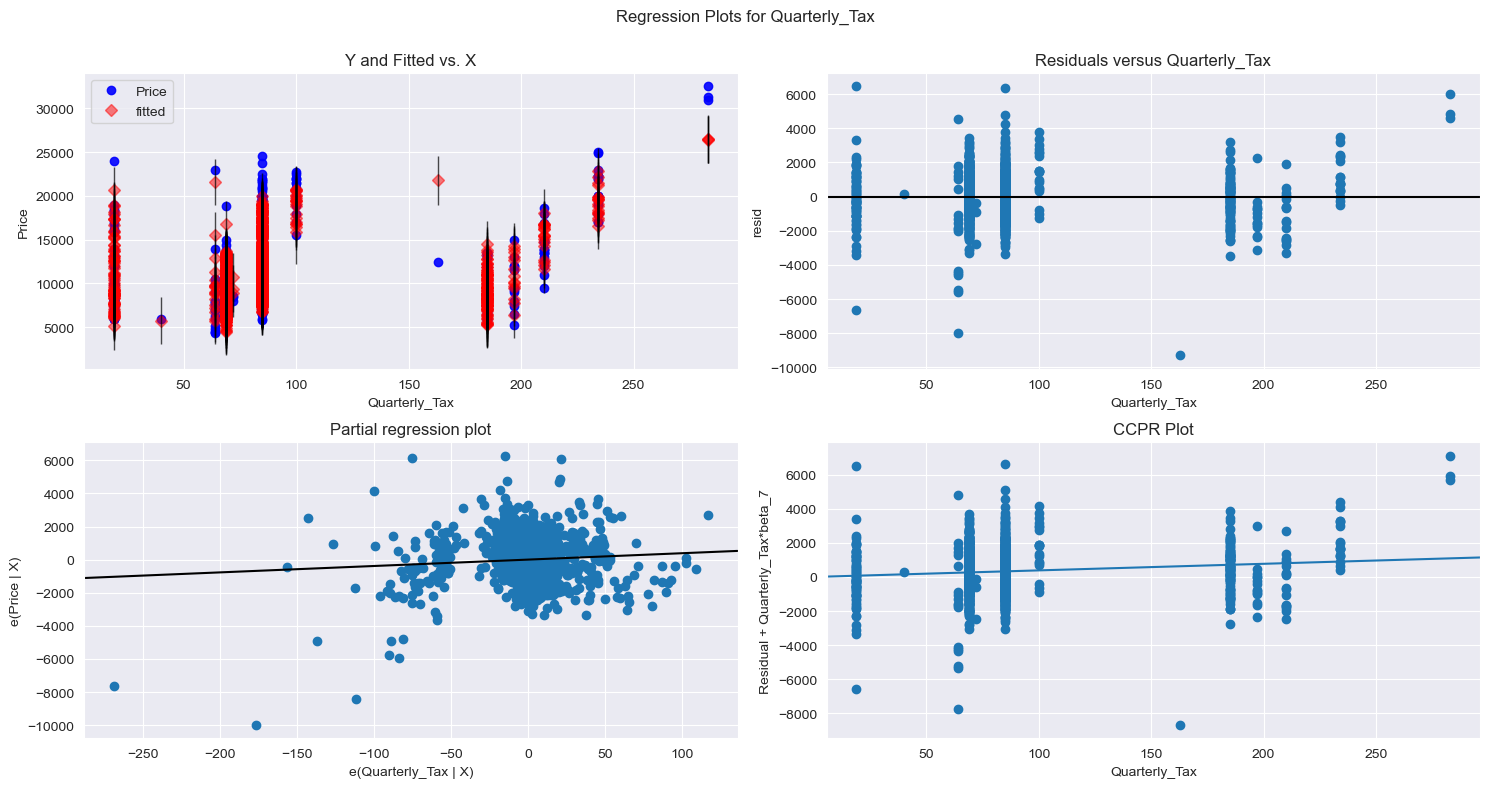

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


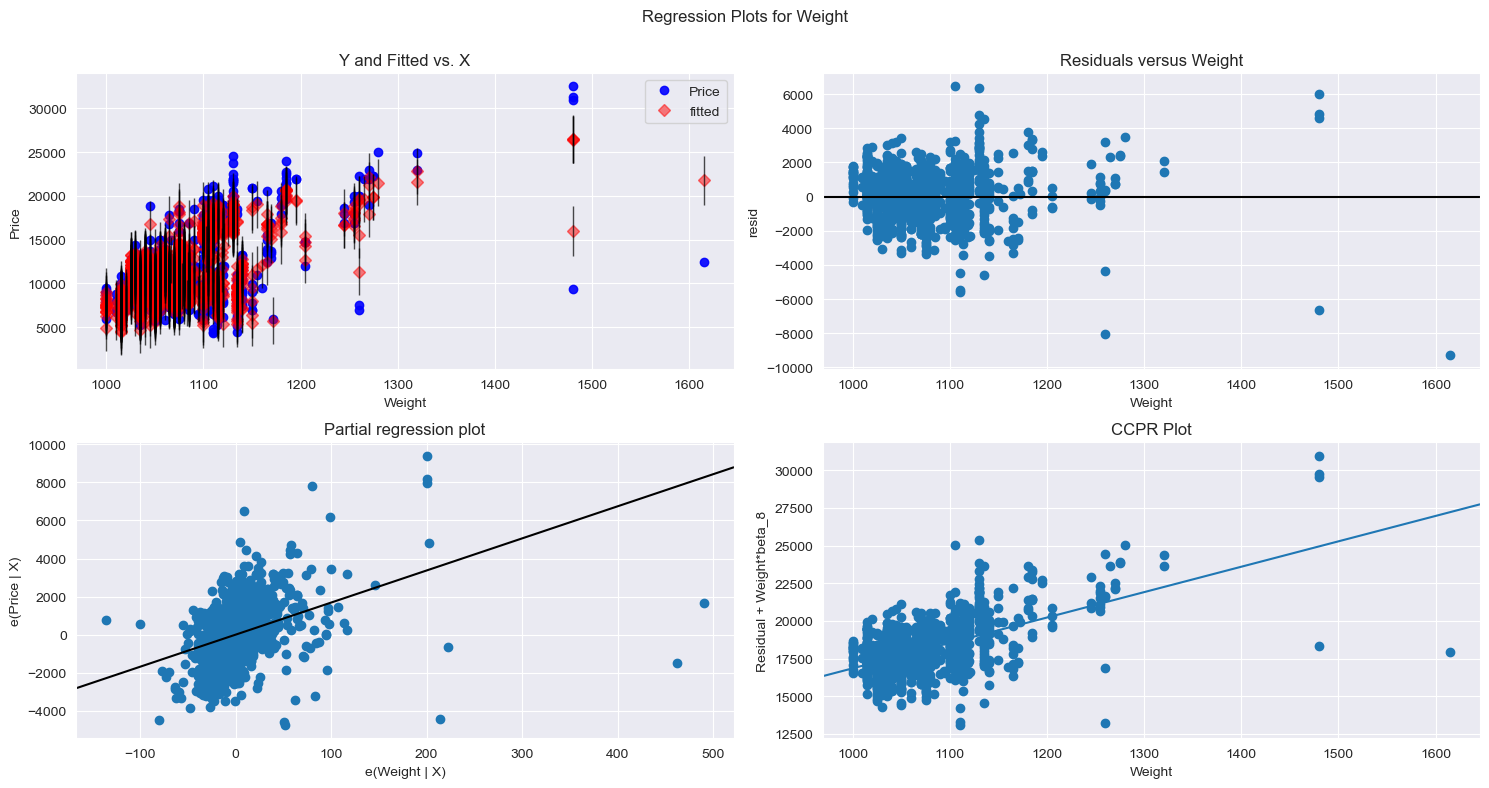

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()


In [36]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

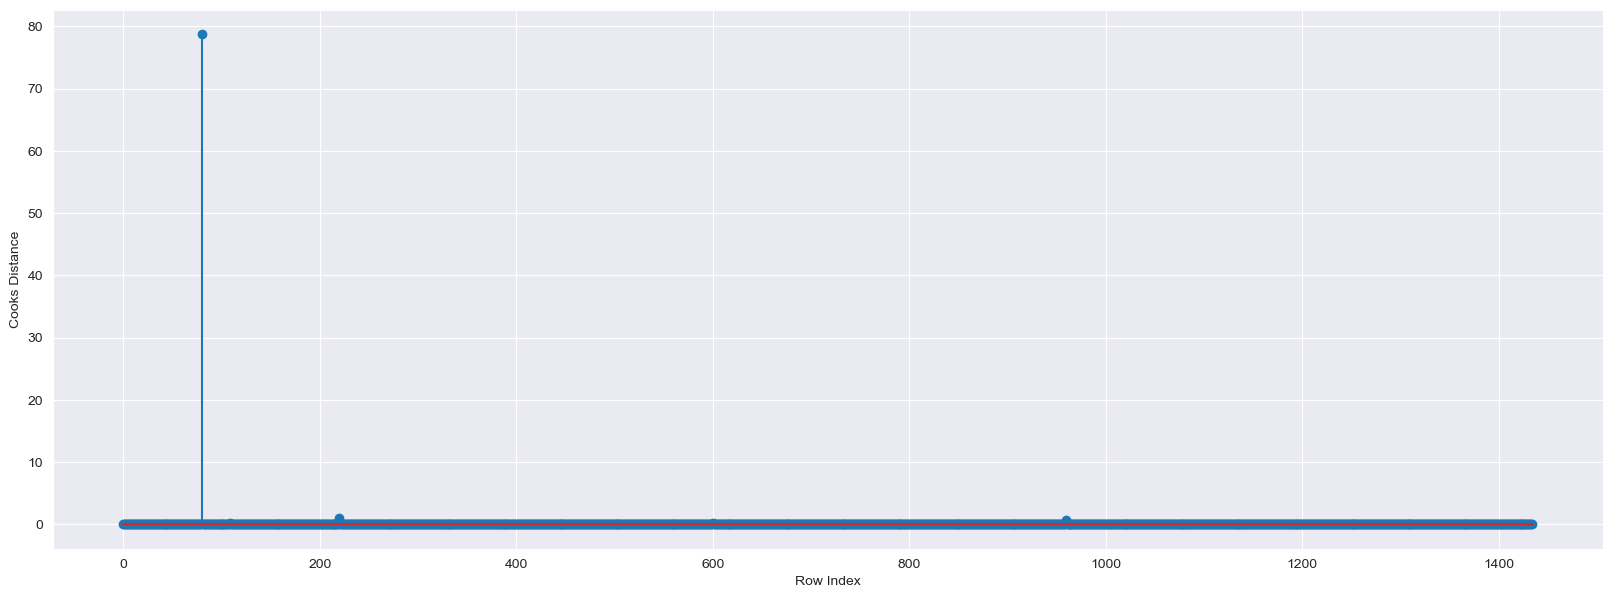

In [37]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(new_data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

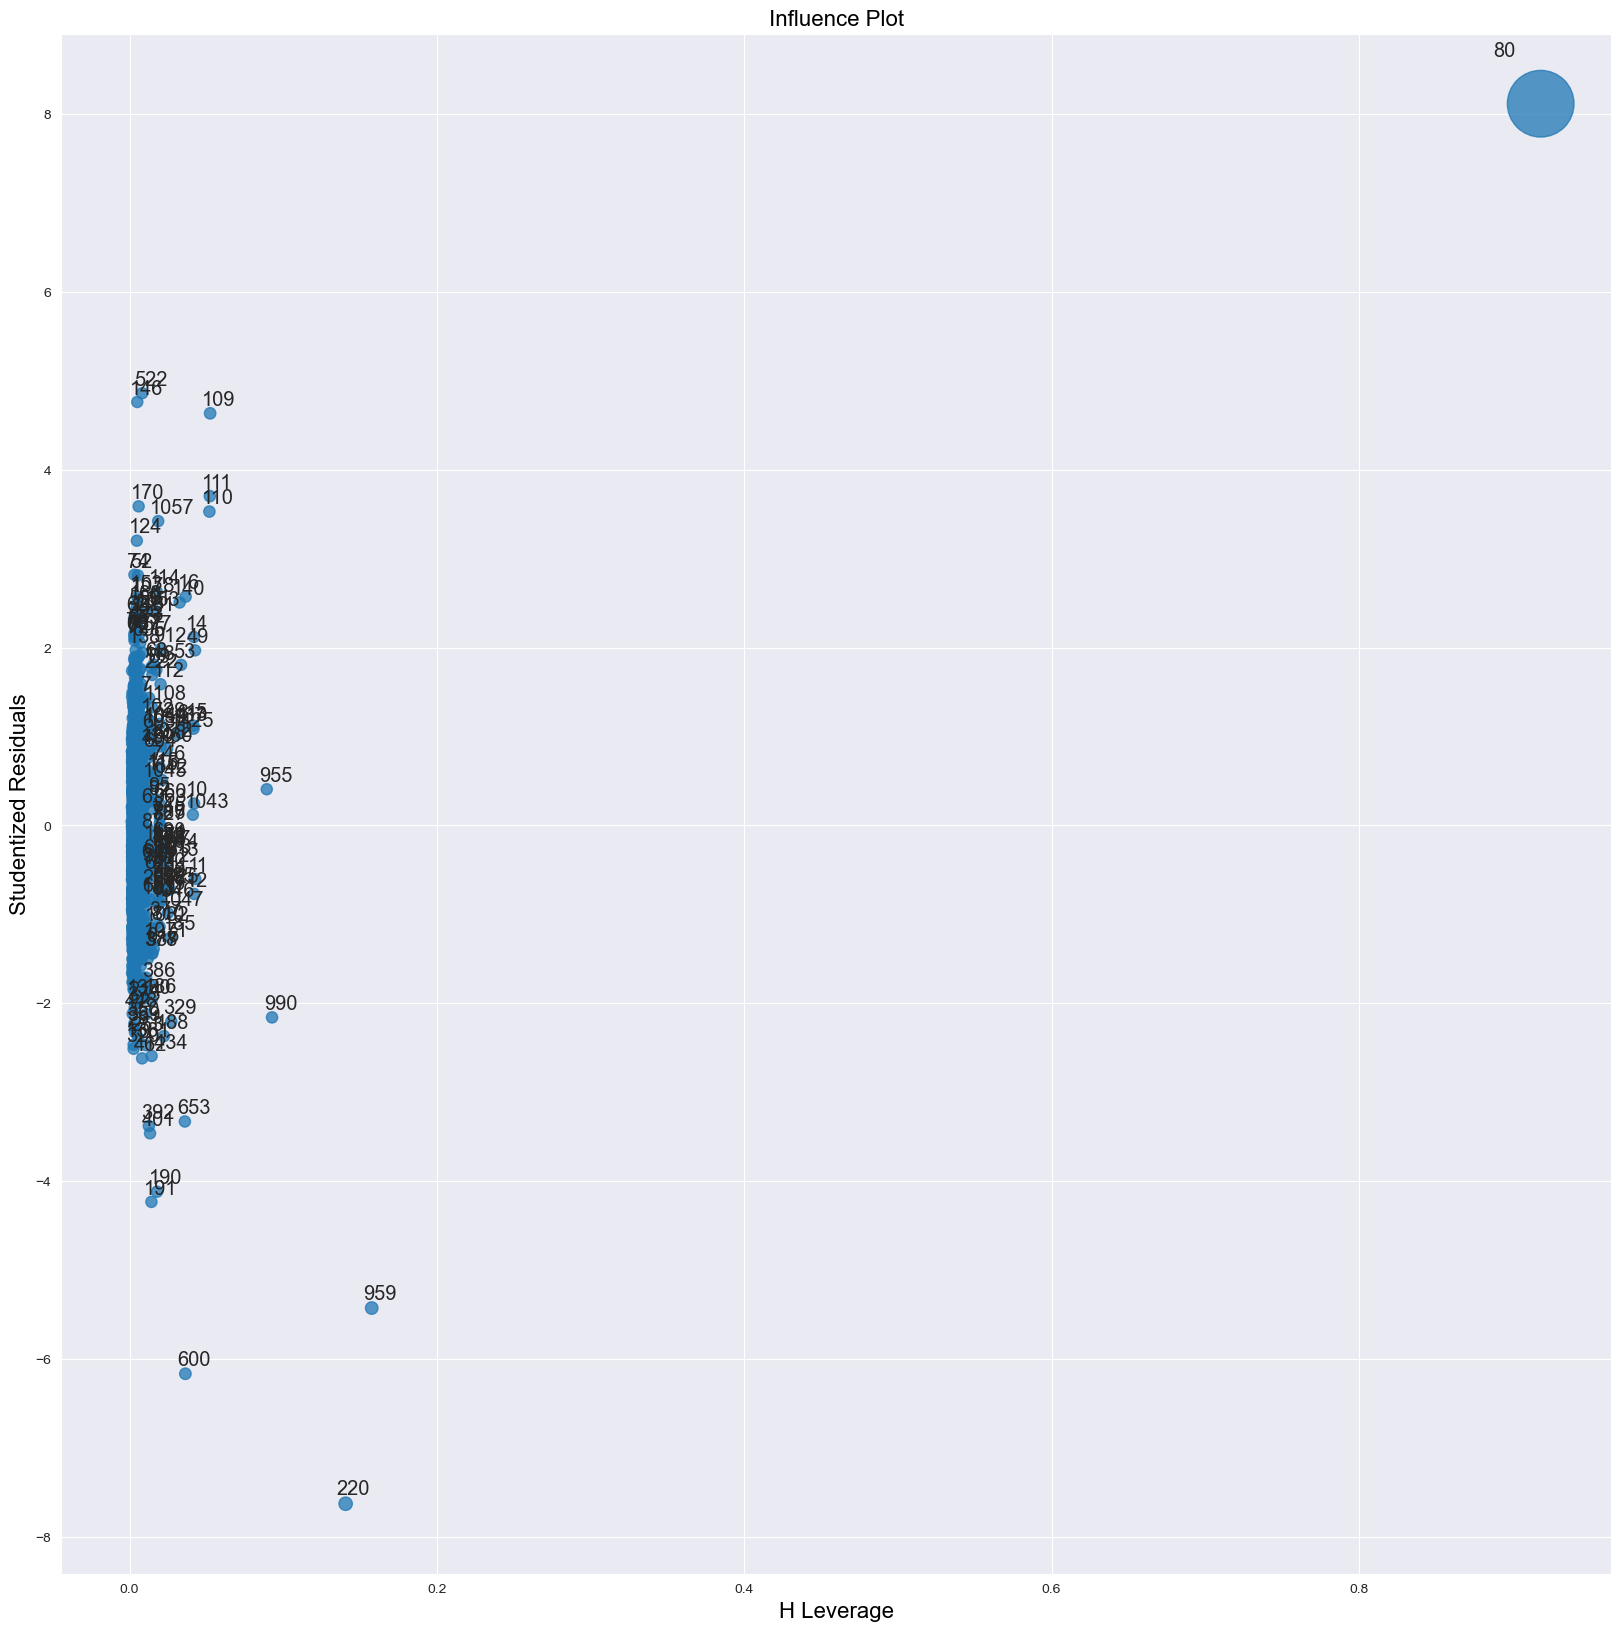

In [38]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [39]:
new_data=new_data.drop(new_data.index[[80]],axis=0).reset_index(drop=True)
new_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [40]:

 while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new_data=new_data.drop(new_data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new_data
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [42]:
pred=final_model.predict(new_data)
pred

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64